In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('mammals.csv')

In [3]:
data.head()

,species,body_wt,brain_wt,non_dreaming,dreaming,total_sleep,life_span,gestation,predation,exposure,danger
0,Africanelephant,6654.000,5712.0,NaN,NaN,3.3,38.6,645.0,3,5,3
1,Africangiantpouchedrat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
2,ArcticFox,3.385,44.5,NaN,NaN,12.5,14.0,60.0,1,1,1
3,Arcticgroundsquirrel,0.920,5.7,NaN,NaN,16.5,NaN,25.0,5,2,3
4,Asianelephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4


In [4]:
data.tail()

,species,body_wt,brain_wt,non_dreaming,dreaming,total_sleep,life_span,gestation,predation,exposure,danger
57,Treehyrax,2.000,12.3,4.9,0.5,5.4,7.5,200.0,3,1,3
58,Treeshrew,0.104,2.5,13.2,2.6,15.8,2.3,46.0,3,2,2
59,Vervet,4.190,58.0,9.7,0.6,10.3,24.0,210.0,4,3,4
60,Wateropossum,3.500,3.9,12.8,6.6,19.4,3.0,14.0,2,1,1
61,Yellow-belliedmarmot,4.050,17.0,NaN,NaN,NaN,13.0,38.0,3,1,1


In [5]:
data.shape

(62, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       62 non-null     object 
 1   body_wt       62 non-null     float64
 2   brain_wt      62 non-null     float64
 3   non_dreaming  48 non-null     float64
 4   dreaming      50 non-null     float64
 5   total_sleep   58 non-null     float64
 6   life_span     58 non-null     float64
 7   gestation     58 non-null     float64
 8   predation     62 non-null     int64  
 9   exposure      62 non-null     int64  
 10  danger        62 non-null     int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 5.5+ KB


In [7]:
data.isnull().sum()

species          0
body_wt          0
brain_wt         0
non_dreaming    14
dreaming        12
total_sleep      4
life_span        4
gestation        4
predation        0
exposure         0
danger           0
dtype: int64

In [8]:
data.corr()

C:\Users\nidhi\AppData\Local\Temp\ipykernel_1792\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,body_wt,brain_wt,non_dreaming,dreaming,total_sleep,life_span,gestation,predation,exposure,danger
body_wt,1.000000,0.934164,-0.375946,-0.109383,-0.307186,0.302451,0.651102,0.059495,0.338274,0.133581
brain_wt,0.934164,1.000000,-0.369218,-0.105139,-0.358102,0.509253,0.747242,0.033855,0.367800,0.145879
non_dreaming,-0.375946,-0.369218,1.000000,0.514254,0.962715,-0.384432,-0.594703,-0.318185,-0.543757,-0.483852
dreaming,-0.109383,-0.105139,0.514254,1.000000,0.727087,-0.295745,-0.450899,-0.447471,-0.537225,-0.579337
total_sleep,-0.307186,-0.358102,0.962715,0.727087,1.000000,-0.410202,-0.631326,-0.395835,-0.642285,-0.587742
life_span,0.302451,0.509253,-0.384432,-0.295745,-0.410202,1.000000,0.614849,-0.102544,0.360352,0.061778
gestation,0.651102,0.747242,-0.594703,-0.450899,-0.631326,0.614849,1.000000,0.200504,0.638279,0.378617
predation,0.059495,0.033855,-0.318185,-0.447471,-0.395835,-0.102544,0.200504,1.000000,0.618246,0.916042
exposure,0.338274,0.367800,-0.543757,-0.537225,-0.642285,0.360352,0.638279,0.618246,1.000000,0.787203
danger,0.133581,0.145879,-0.483852,-0.579337,-0.587742,0.061778,0.378617,0.916042,0.787203,1.000000


In [9]:
data=data.drop(columns=['species','non_dreaming','dreaming','total_sleep','life_span','gestation','predation','exposure','danger'],axis=1)

In [10]:
data

,body_wt,brain_wt
0,6654.000,5712.0
1,1.000,6.6
2,3.385,44.5
3,0.920,5.7
4,2547.000,4603.0
...,...,...
57,2.000,12.3
58,0.104,2.5
59,4.190,58.0
60,3.500,3.9


In [11]:
x = np.array(data['brain_wt']).reshape(-1, 1)
y = np.array(data['body_wt']).reshape(-1, 1)

In [12]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=42,test_size=0.2)

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

In [14]:
regr=linear_model.LinearRegression()
regr.fit(train_x,train_y)
y_pred=regr.predict(test_x)

In [15]:
zz = regr.coef_*1000+regr.intercept_

In [16]:
zz

array([[524.21893237]])

In [17]:
print('Accuracy: '+str(regr.score(test_x,test_y)*100)+'%')

Accuracy: 67.44362182978874%


In [18]:
y_pred=regr.predict([[1000]])
y_pred

array([[524.21893237]])

In [19]:
listToStr = ' '.join([str(elem) for elem in y_pred])
 
print(listToStr)

[524.21893237]


In [20]:
print("The predicted body_weight for brain_weight 1000 is:",str(listToStr))

The predicted body_weight for brain_weight 1000 is: [524.21893237]


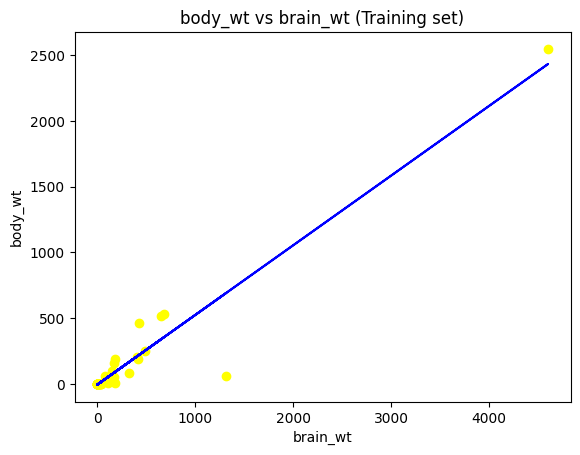

In [21]:
# Visualising the Training set results
import matplotlib.pyplot as plt
plt.scatter(train_x,train_y, color = 'Yellow')
plt.plot(train_x, regr.predict(train_x), color = 'blue')
plt.title('body_wt vs brain_wt (Training set)')
plt.xlabel('brain_wt')
plt.ylabel('body_wt')
plt.show()

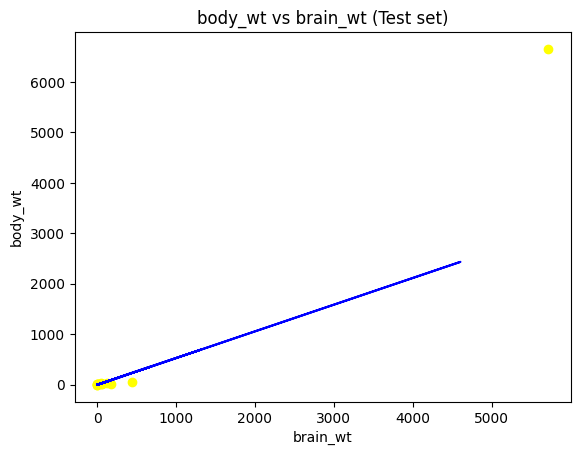

In [22]:
# Visualising the Test set results
plt.scatter(test_x,test_y, color = 'Yellow')
plt.plot(train_x, regr.predict(train_x), color = 'blue')
plt.title('body_wt vs brain_wt (Test set)')
plt.xlabel('brain_wt')
plt.ylabel('body_wt')
plt.show()